# Numpy
Collection of ***most useful*** numpy functions

Credits:  
- Alex Chabot-Leclerc, Enthought
 https://www.youtube.com/watch?v=ZB7BZMhfPgk
- Eric Olsen, Enthought https://www.youtube.com/watch?v=NwYt5FKBsGU
- Juan Nunuz-Iglesias, Enthought https://www.youtube.com/watch?v=cYugp9IN1-Q

In [1]:
import numpy as np

<img style="float:center;" src="images/0.jpg" width="450"/> 
<img style="float:center;" src="images/1.jpg" width="450"/>
<img style="float:center;" src="images/2.jpg" width="450"/>
<img style="float:center;" src="images/3.jpg" width="450"/>
<img style="float:center;" src="images/4.jpg" width="450"/>
<img style="float:center;" src="images/5.jpg" width="450"/>
<img style="float:center;" src="images/6.jpg" width="450"/>
<img style="float:center;" src="images/7.jpg" width="450"/>

In [2]:
# Create using arange (not arrange) and reshape

a = np.arange(16).reshape(4,4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [3]:
b = a[1:3, 1:3]
print(b)
print('b is a new array object (slice of a) but its NOT a new data')

[[ 5  6]
 [ 9 10]]
b is a new array object (slice of a) but its NOT a new data


In [4]:
b += 1000  # this modifies a as well
print(b)
print(a)

print('Be careful with such mistakes')

[[1005 1006]
 [1009 1010]]
[[   0    1    2    3]
 [   4 1005 1006    7]
 [   8 1009 1010   11]
 [  12   13   14   15]]
Be careful with such mistakes


In [5]:
a = np.arange(16).reshape(4,4)
b = a[2:4, 2:4] + 0 # trick (new data = slice of a + 0)
b += 1000
print(b)
print(a)

[[1010 1011]
 [1014 1015]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [6]:
a = np.arange(16).reshape(4,4)
b = np.array(a[2:4, 2:4]) # best and safest
b += 1000
print(b)
print(a)

[[1010 1011]
 [1014 1015]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [7]:
# image compression example using numpy
import matplotlib.pyplot as plt
img = plt.imread("images/DCMetro.jpg")

plt.imshow(img, cmap=plt.cm.hot)
plt.show()
print(img.shape)

<Figure size 640x480 with 1 Axes>

(448, 570, 3)


(446, 568, 3) (446, 568, 3) (446, 568, 3) (446, 568, 3) (446, 568, 3)


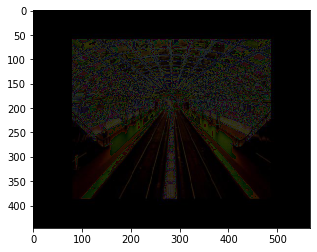

In [8]:
top    = img[:-2,  1:-1, :]
bottom = img[2:,   1:-1, :]
left   = img[1:-1, :-2,  :]
right  = img[1:-1, 2:,   :]
center = img[1:-1, 1:-1, :]
print(top.shape, bottom.shape, left.shape, right.shape, center.shape)
blurImg = (top+bottom+left+right+center)/5/255
plt.imshow(blurImg, cmap=plt.cm.hot)
plt.show()

In [9]:
a = np.random.rand(5,5)
print(a)

[[0.63241451 0.30927625 0.40183695 0.76727895 0.65518868]
 [0.13350316 0.07338479 0.59245452 0.05787947 0.26571945]
 [0.50218541 0.61676727 0.80742522 0.83610467 0.38081352]
 [0.72188767 0.94483765 0.78977811 0.11499508 0.67833074]
 [0.62357814 0.99869173 0.07911091 0.71423195 0.20836033]]


In [10]:
# min / max (values) and argmin / argmax (indices)
print(a.min(axis=1))
print(a.argmin(axis=1))
print(a.max(axis=1))
print(a.argmax(axis=1))

[0.30927625 0.05787947 0.38081352 0.11499508 0.07911091]
[1 3 4 3 2]
[0.76727895 0.59245452 0.83610467 0.94483765 0.99869173]
[3 2 3 1 1]


In [11]:
# mask and location
mask = a>0.5
location = np.where(mask)
print(mask)
print(np.array(location)) # returns the coords where the mask is True

# or simply do
print(np.array(np.where(a>0.5)))

[[ True False False  True  True]
 [False False  True False False]
 [ True  True  True  True False]
 [ True  True  True False  True]
 [ True  True False  True False]]
[[0 0 0 1 2 2 2 2 3 3 3 3 4 4 4]
 [0 3 4 2 0 1 2 3 0 1 2 4 0 1 3]]
[[0 0 0 1 2 2 2 2 3 3 3 3 4 4 4]
 [0 3 4 2 0 1 2 3 0 1 2 4 0 1 3]]
